# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

- Understand what factors make a used car more or less expensive. 
- Provide a recommendation to the used car dealoers on what factors in a used car are valued by customers

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/vehicles.csv')
df.head()
df
# df.describe()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


- The data contains 426880 rows of car data with 19 columns 
- There are a lot of NaN values.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [22]:
df.dropna(inplace=True)
df.info()
df.value_counts()

for col in df.columns:
    print(col)
    print(df[col].unique())
    print(df[col].nunique())
    print('\n')

df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 34868 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34868 non-null  int64  
 1   region        34868 non-null  object 
 2   price         34868 non-null  int64  
 3   year          34868 non-null  float64
 4   manufacturer  34868 non-null  object 
 5   model         34868 non-null  object 
 6   condition     34868 non-null  object 
 7   cylinders     34868 non-null  object 
 8   fuel          34868 non-null  object 
 9   odometer      34868 non-null  float64
 10  title_status  34868 non-null  object 
 11  transmission  34868 non-null  object 
 12  VIN           34868 non-null  object 
 13  drive         34868 non-null  object 
 14  size          34868 non-null  object 
 15  type          34868 non-null  object 
 16  paint_color   34868 non-null  object 
 17  state         34868 non-null  object 
dtypes: float64(2), int64(2), obj

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


- Out of 18 columns there are 4 numerical columns and 14 categorical columns. 
- There are total 12 different paint colors 
- There is data from all the states of USA 
- After dropping non-null values there were 34868 entries. 

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Preparation Steps 
- Drop Null Values
- Remove rows that have price values set to 0.
- Drop the columns that have no impact on price of the car(like IDs, VIN numbers etc.,). Draw the price to column value relationship plots. 
- Transform Non-Numerical columns into Numberical Columns or Use Encodings 
- Determine the most useful columns via the Correlation Plots.



In [ ]:
df = pd.read_csv('data/vehicles.csv')
df_prepared = df.dropna()
df_prepared = df_prepared.drop(columns=['id', 'VIN', 'state', 'region'])
df_prepared = df_prepared[df_prepared['price'] != 0].reset_index(drop=True)
df_prepared.head()
df_prepared.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32496 entries, 0 to 32495
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        32496 non-null  object 
 1   price         32496 non-null  int64  
 2   year          32496 non-null  float64
 3   manufacturer  32496 non-null  object 
 4   model         32496 non-null  object 
 5   condition     32496 non-null  object 
 6   cylinders     32496 non-null  object 
 7   fuel          32496 non-null  object 
 8   odometer      32496 non-null  float64
 9   title_status  32496 non-null  object 
 10  transmission  32496 non-null  object 
 11  drive         32496 non-null  object 
 12  size          32496 non-null  object 
 13  type          32496 non-null  object 
 14  paint_color   32496 non-null  object 
 15  state         32496 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 4.0+ MB


In [38]:
df_prepared['cylinders'].value_counts()

cylinders
6 cylinders     10794
4 cylinders     10661
8 cylinders     10053
10 cylinders      548
5 cylinders       271
other              92
3 cylinders        66
12 cylinders       11
Name: count, dtype: int64

In [ ]:
# Convert cylinders to numeric
df_prepared['cylinders'] = df_prepared['cylinders'].str.replace('cylinders', '')
df_prepared = df_prepared[df_prepared['cylinders'] != 'other'].reset_index(drop=True)
df_prepared['cylinders'] = df_prepared['cylinders'].astype(int)
df_prepared['cylinders'].value_counts()

cylinders
6     10794
4     10661
8     10053
10      548
5       271
3        66
12       11
Name: count, dtype: int64

In [49]:
df_prepared['size'].value_counts()

size
full-size      19141
mid-size        8898
compact         3782
sub-compact      583
Name: count, dtype: int64

In [50]:
df_prepared['paint_color'].value_counts()

paint_color
white     9065
black     5975
silver    4473
grey      3977
blue      3129
red       2893
custom     866
green      841
brown      747
yellow     214
orange     152
purple      72
Name: count, dtype: int64

In [51]:
df_prepared['fuel'].value_counts()

fuel
gas         29151
diesel       2813
hybrid        388
other          31
electric       21
Name: count, dtype: int64

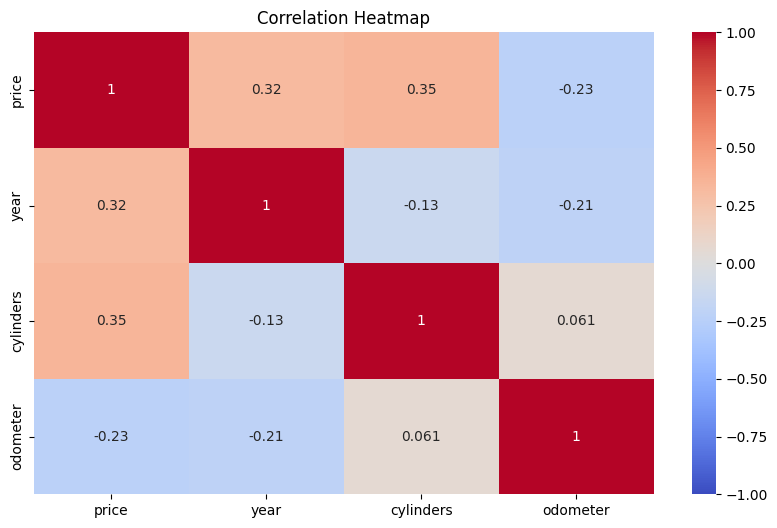

In [48]:
# Selecting numerical features only
data_numeric = df_prepared.select_dtypes(include=['float64', 'int64'])

# Heatmap on numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Observations from Correlation Map 
    - There is a high correlation between year, number of cylinders and price. 
    - There is an inverse correlation between odometer and price. The more the odometer the less the price. 
    - 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Modeling Steps 
- Split the data into Train and Test Data sets 
- Create Pipline models applying transformations to create polynomial regression models

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

- Calculate the minimum MSE of the models created in modeling phase. 
- For the model with least MSE predict values on the test data and observe. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

- Create a report based on the data from the previous step. 